##### John Franklin Crenshaw

.

Physics 566 Problem Set 2

January 31, 2018

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# My plot preferences
plt.rc('font', family='serif')
plt.rc('axes', labelsize='x-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes',titlesize='xx-large')
plt.rc('legend',frameon=False)
plt.rc('legend',fontsize='large')
plt.rcParams['figure.figsize'] = (8,6)

# for better looking inline plots
%config InlineBackend.figure_format = 'retina'

***
#### (1) CP 3.1
###### *Plotting sunspot data with a running average*

In [3]:
# load the sunspot data
month,spots = np.loadtxt('data/sunspots.txt',unpack=True)
year = 1749 + month/12

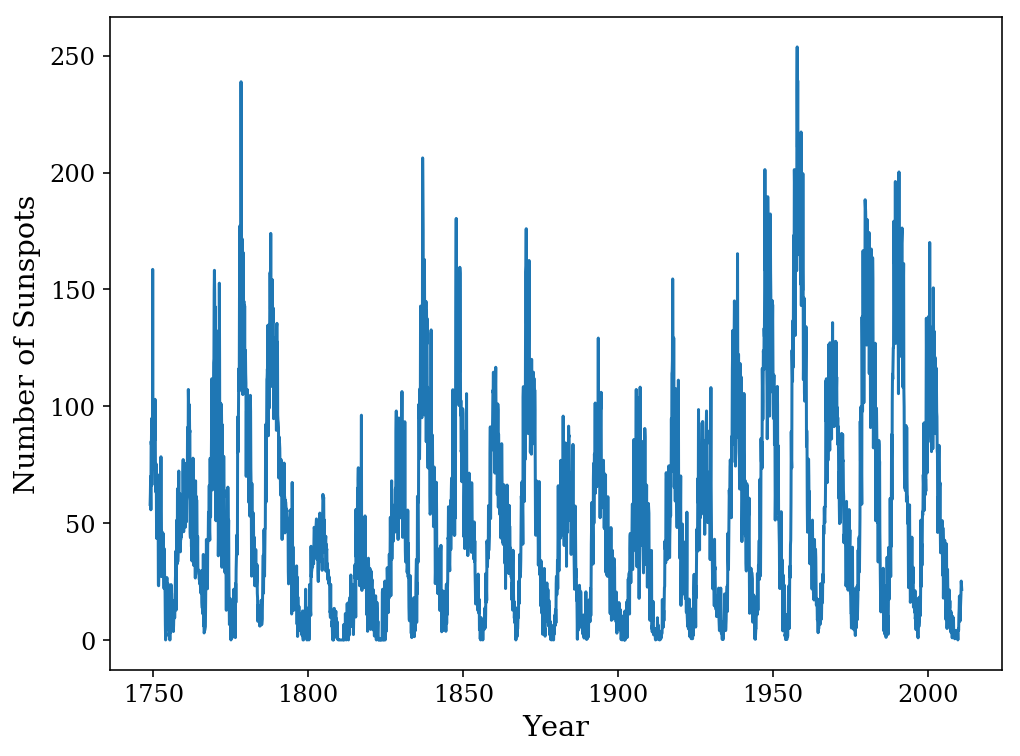

In [4]:
# plot sunspots as a function of time
fig1,ax1 = plt.subplots(1,1)
ax1.plot(year,spots)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sunspots")

plt.show()

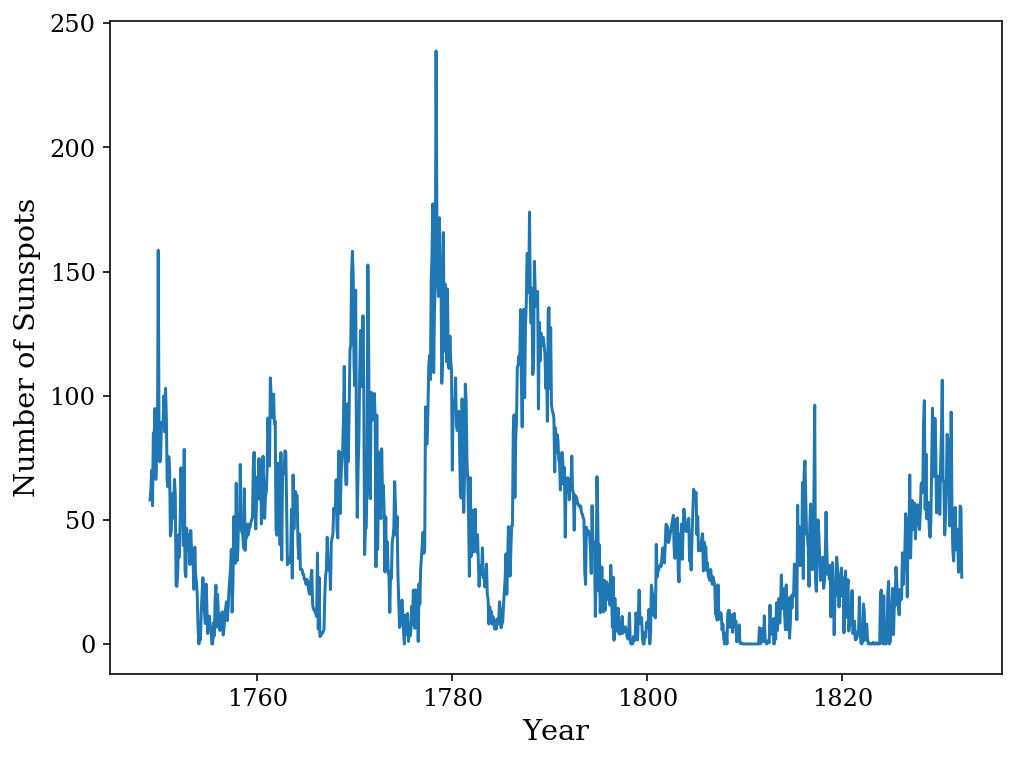

In [5]:
# plot sunspots as a function of time
# this time only the first 1000 months
fig2,ax2 = plt.subplots(1,1)
ax2.plot(year[:1000],spots[:1000])
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Sunspots")

plt.show()

Now I will smooth the data with a running average, defined by
$$ Y_k = \frac{1}{2r} \sum_{m=-r}^{r} y_{k+m}, $$
where $r = 5$. I will exclude the first and last 5 months, as the running average needs data for 5 months on either side of each data point.

In [6]:
# set the "radius" of the smoothing
r = 5
# smooth the data
spots_smooth = [np.mean(spots[i-r:i+r+1]) for i in range(r,len(spots)-r)]

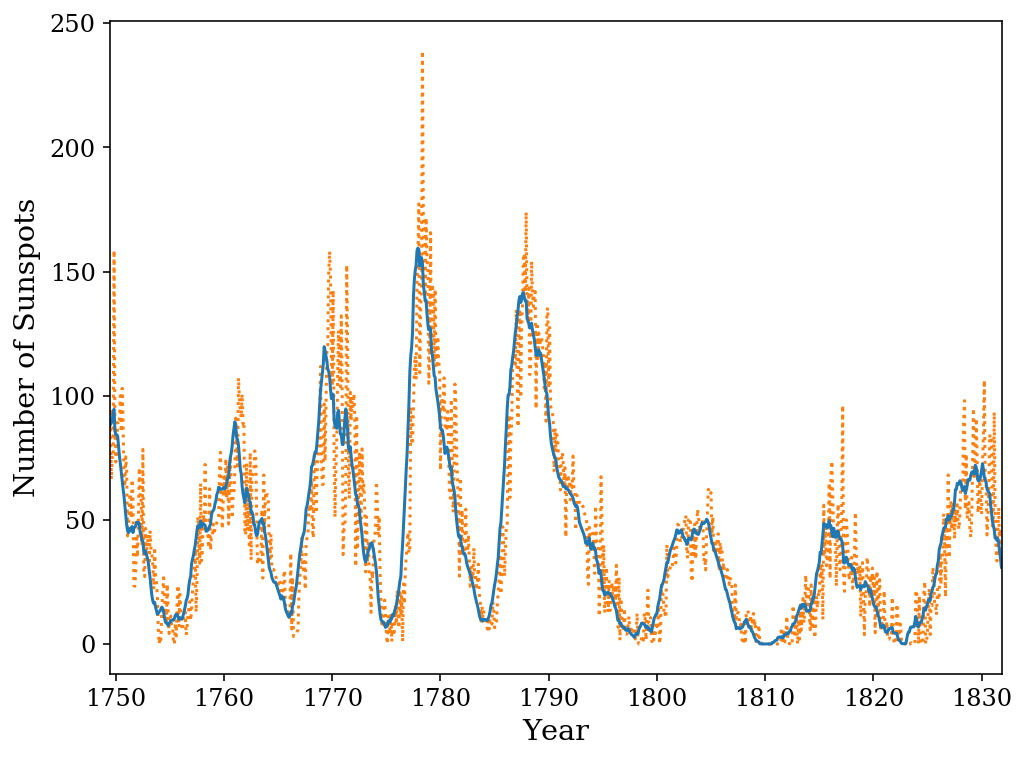

In [7]:
# plot sunspots as a function of time (first 1000 months)
# this time overlay a running average
fig3,ax3 = plt.subplots(1,1)

# raw data
ax3.plot(year[r:1000-r],spots[r:1000-r],linestyle=':',c='C1')
# smoothed data
ax3.plot(year[r:1000-r],spots_smooth[r:1000-r],c='C0')

ax3.set_xlabel("Year")
ax3.set_ylabel("Number of Sunspots")
ax3.set_xlim(year[r],year[1000-r])

plt.show()

***
#### (2) CP 3.2
###### *Polar plots*

The Deltoid curve is described parametrically by the equations
$$ x = 2\cos{\theta} + \cos{2\theta}, \quad \quad y = 2\sin{\theta} - \sin{2\theta}, $$
where $0 \leq \theta < 2\pi$.

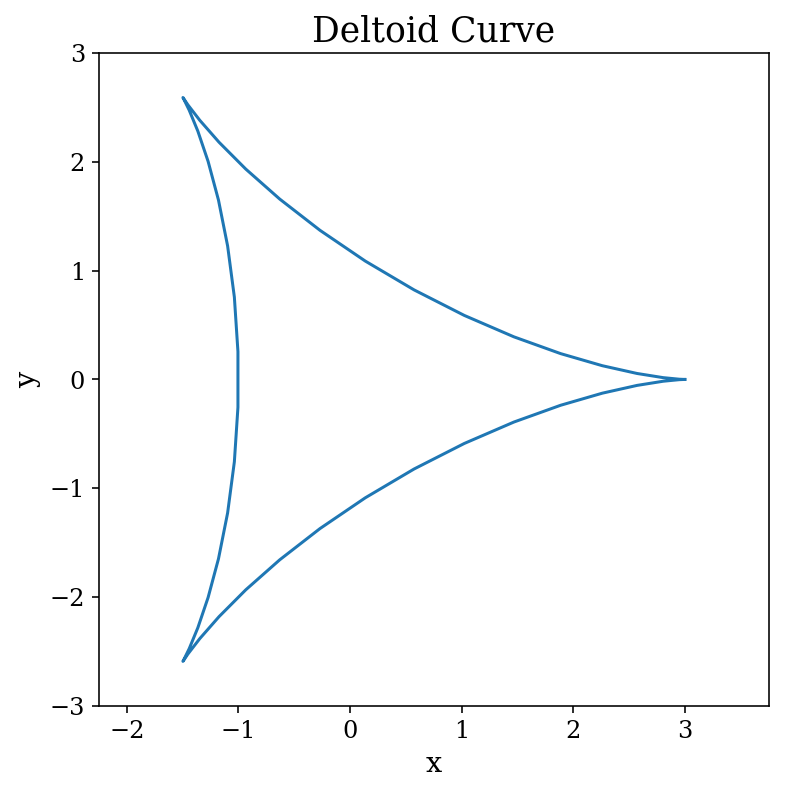

In [8]:
# generate the points for the plot
theta = np.linspace(0,2*np.pi)
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)

# plot the deltoid
fig4,ax4 = plt.subplots(1,1,figsize=(6,6))
ax4.set_title("Deltoid Curve")

ax4.plot(x,y)

ax4.set_xlim(-2.25,3.75)
ax4.set_ylim(-3,3)

ax4.set_xlabel("x")
ax4.set_ylabel("y")

plt.show()

The Galilean spiral is defined by the equation $r = \theta^2$. I will plot this for $0 \leq \theta \leq 10\pi$.

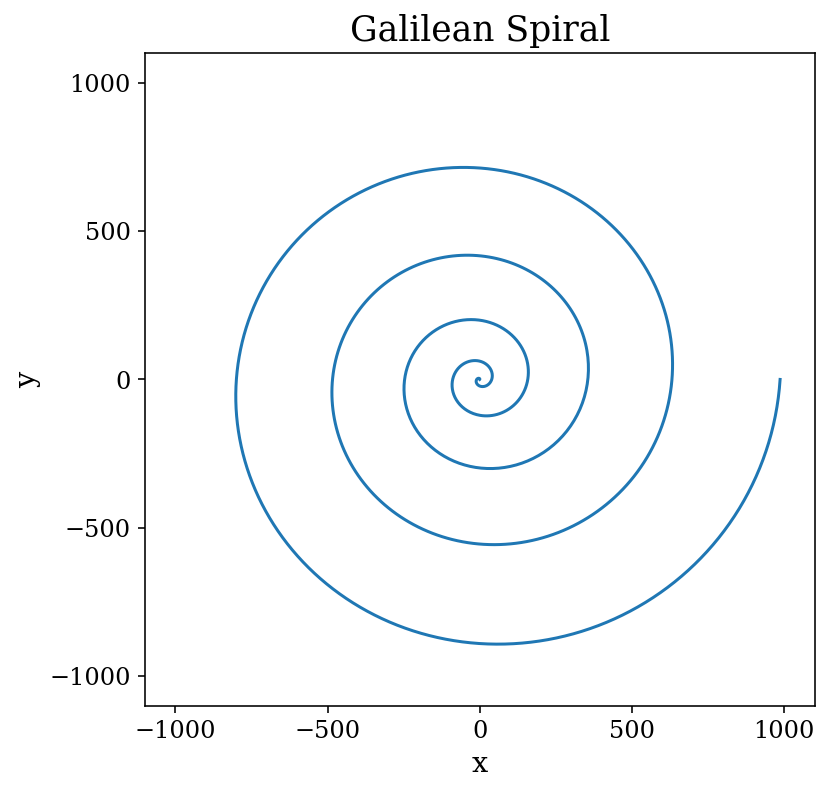

In [9]:
# generate the points for the plot
theta = np.linspace(0,10*np.pi,1000)
x = theta*theta*np.cos(theta)
y = theta*theta*np.sin(theta)

# plot the spiral
fig5,ax5 = plt.subplots(1,1,figsize=(6,6))
ax5.set_title("Galilean Spiral")

ax5.plot(x,y)

ax5.set_xlim(-1100,1100)
ax5.set_ylim(-1100,1100)
ax5.set_xticks([-1000,-500,0,500,1000])
ax5.set_yticks([-1000,-500,0,500,1000])

ax5.set_xlabel("x")
ax5.set_ylabel("y")

plt.show()

Fey's Function is defined by the equation
$$ r = e^{\cos{\theta}}-2\cos{4\theta}+\sin^5{\frac{\theta}{12}}. $$
I will plot this for $0 \leq \theta \leq 24\pi$.

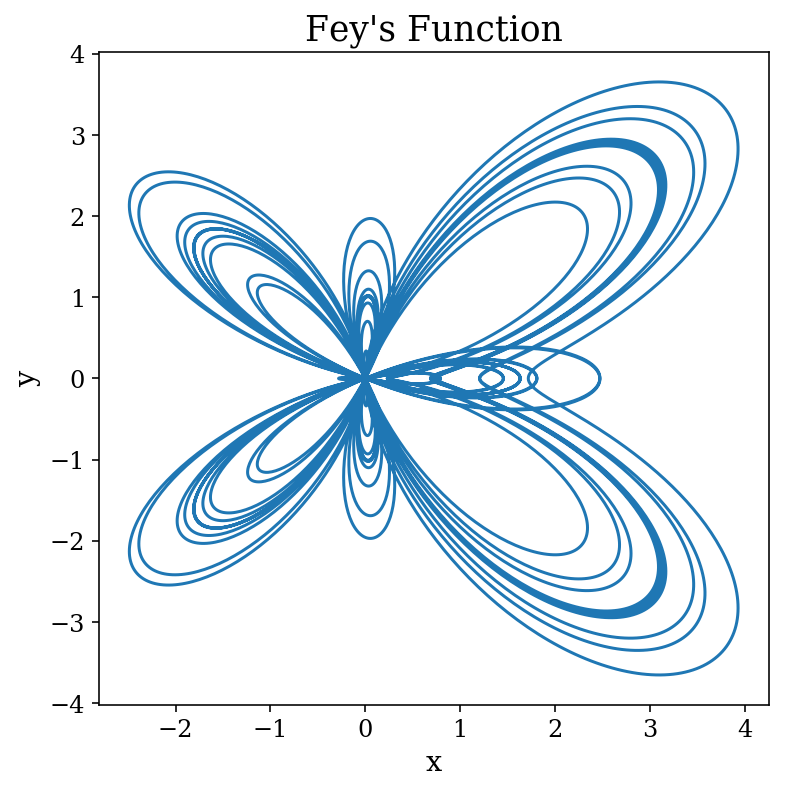

In [10]:
# generate the points for the plot
theta = np.linspace(0,24*np.pi,10000)
r = np.exp(np.cos(theta)) - 2*np.cos(4*theta)+np.sin(theta/12)**5
x = r*np.cos(theta)
y = r*np.sin(theta)

# plot the spiral
fig6,ax6 = plt.subplots(1,1,figsize=(6,6))
ax6.set_title("Fey's Function")

ax6.plot(x,y)

ax6.set_xlabel("x")
ax6.set_ylabel("y")

plt.show()

***
#### (3) CP 3.8
###### *Least squares regression*

A common method of fitting a linear function to data is to minimize the sum of the squared differences of the data points and the function. The sum of the squared differences is
$$ \chi^2 = \sum_{i=1}^N (m x_i + c - y_i)^2. $$

Minimizing this sum, we find 
$$ m = \frac{E_{xy} - E_x E_y}{E_{xx} - E_x^2} \quad 
c = \frac{E_{xx} E_y - E_x E_{xy}}{E_{xx} - E_x^2},$$

where
$$ E_x = \frac{1}{N} \sum_{i=1}^N x_i,\quad
E_y = \frac{1}{N} \sum_{i=1}^N y_i,\\
E_{xx} = \frac{1}{N} \sum_{i=1}^N x_i^2,\quad
E_{xy} = \frac{1}{N} \sum_{i=1}^N x_i y_i.
$$

Below I use this method to find a linear fit to Robert Millikan's Photoelectric Effect data.

In [11]:
# load the data
freq,volt = np.loadtxt('data/millikan.txt',unpack=True)

In [12]:
# function to perform linear fit
def linear_fit(x,y):
    """This function performs a linear fit on data.
    
    Takes x,y arrays and returns the slope and intercept."""
    
    Ex = np.mean(x)
    Ey = np.mean(y)
    Exx = np.mean(x**2)
    Exy = np.mean(x*y)

    m = (Exy-Ex*Ey)/(Exx-Ex**2)
    c = (Exx*Ey-Ex*Exy)/(Exx-Ex**2) 
    
    return m,c

In [13]:
# Perform the regression
m,c = linear_fit(freq,volt)
fit_line = lambda x: m*x+c

print("From least square regression:")
print("slope: {0:.3e}".format(m))
print("intercept: {0:.3f}".format(c))

From least square regression:
slope: 4.088e-15
intercept: -1.731


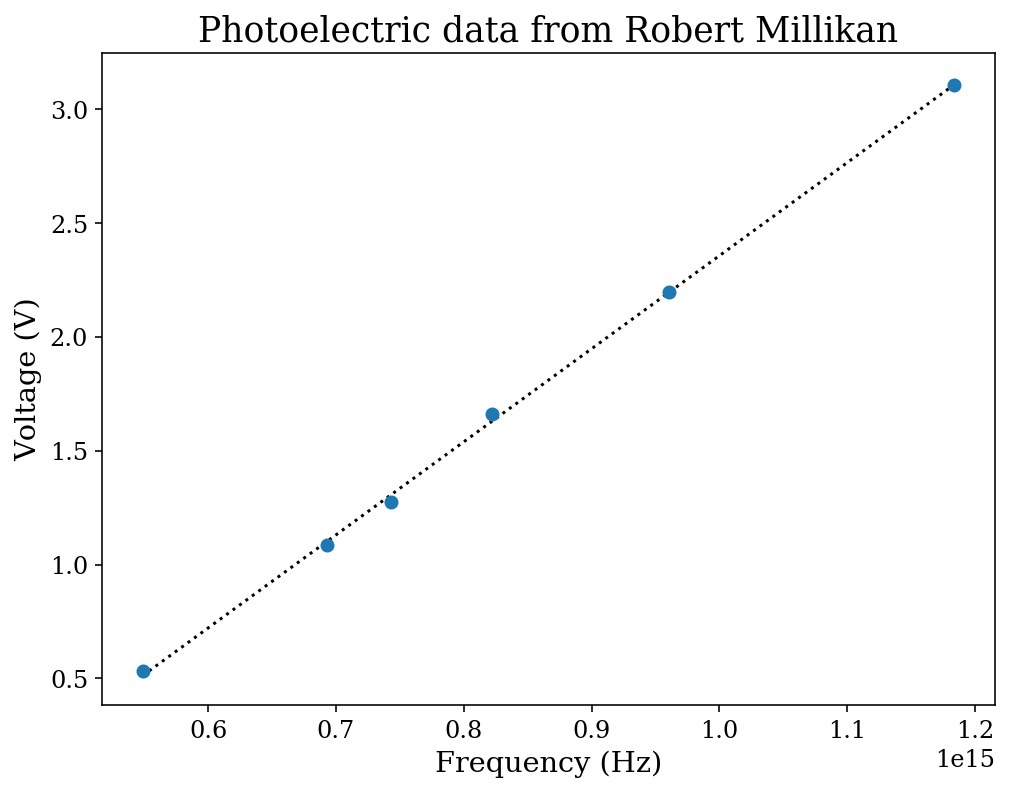

In [14]:
# plot the data
fig7,ax7 = plt.subplots(1,1)
ax7.set_title("Photoelectric data from Robert Millikan")

# the data
ax7.scatter(freq,volt)
# the linear fit
ax7.plot(freq,fit_line(freq),c='k',linestyle=':',zorder=0)

ax7.set_xlabel("Frequency (Hz)")
ax7.set_ylabel("Voltage (V)")

plt.show()

From this data, one can calculate Planck's Constant, $h$. The voltage and the frequency are related by the equation
$$ V = \frac{h}{e} v - \phi, $$
where $e$ is the electron charge and $\phi$ is the work function of the metal. Thus we can calculate $h$ from our fitted slope: $h = m e$.

In [15]:
# calculate Planck's constant
e = 1.602e-19 # electron charge, C
h = m*e # planck's constant, kg*m^2/s
h_acc = 6.62607e-34 # accepted value of planck's const., kg*m^2/s

print("From the Millikan data, I estimate that Planck's",
         "constant is {0:0.2e} kg*m^2/s.".format(h))
print(("This is a {0:.1f}% difference from the accepted "+
       "value of {1:0.2e} kg*m^2/s.").format(
         np.abs((h-h_acc)/h_acc)*100,h_acc))

From the Millikan data, I estimate that Planck's constant is 6.55e-34 kg*m^2/s.
This is a 1.2% difference from the accepted value of 6.63e-34 kg*m^2/s.


***
#### (4) CP 4.4
###### *Approximating an integral with the Riemann definition of the integral.*

An integral can be approximated by dividing the domain of integration into $N$ slices of width $h=\frac{b-a}{N}$ and using the Riemann definition of the integral: 
$$ I = \lim_{N\to\infty} \sum_{k=1}^N h \cdot f(a+hk). $$

I will use this below to estimate the integral $\int_{-1}^1 \sqrt{1-x^2}dx$.

In [16]:
# The function we want to integrate
semi_circle = lambda x: np.sqrt(1-x**2)

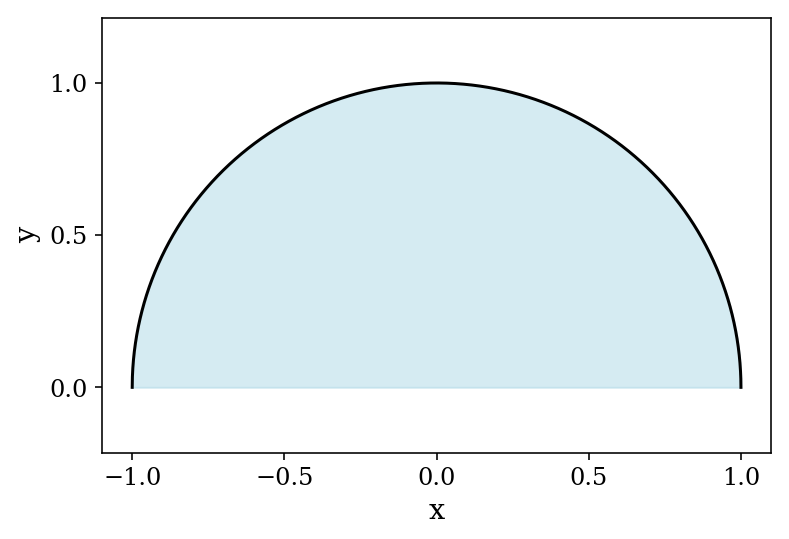

In [17]:
# visualize the function to be integrated
fig8,ax8 = plt.subplots(1,1,figsize=(6,4))

x = np.linspace(-1,1,10000)
ax8.plot(x,semi_circle(x),c='k')
ax8.fill_between(x,semi_circle(x),color='lightblue',alpha=0.5)

ax8.axis('equal') # scale axes so that circles are circular
ax8.set_xticks([-1,-0.5,0,0.5,1])
ax8.set_yticks([0,0.5,1])

ax8.set_xlabel("x")
ax8.set_ylabel("y")

plt.show()

This is obviously half of a circle of radius 1, so the integral is $\frac{\pi}{2} \approx 1.57079632679\ldots$

In [18]:
# integral approximator
def riemann_approx(f,a,b,N):
    """Approximate the integral of f(x) from x=a to x=b.
    Uses the Riemann Integral with N steps."""
    
    x = np.linspace(a,b,N+1)
    h = (b-a)/N
    return h*sum(f(x))

First approximate with $N=100$.

In [19]:
N = 100
int1 = riemann_approx(semi_circle,-1,1,N) # integral approximation
diff1 = int1-np.pi/2 # difference from true answer
pdiff1 = (int1-(np.pi/2))/(np.pi/2)*100 # percent difference

print("The Riemann Integral with {0} steps yielded {1:.4f}.".format(N,int1))
print("The true value is approximately {0:.4f}.".format(np.pi/2))
print("The difference is {0:.4f} ({1:.1f}%).".format(diff1,pdiff1))

The Riemann Integral with 100 steps yielded 1.5691.
The true value is approximately 1.5708.
The difference is -0.0017 (-0.1%).


Now try a much larger $N$ to improve accuracy.

In [20]:
%%time
N = 10000000
int2 = riemann_approx(semi_circle,-1,1,N) # integral approximation
diff2 = int2-np.pi/2 # difference from true answer
pdiff2 = (int2-(np.pi/2))/(np.pi/2)*100 # percent difference

print("The Riemann Integral with {0:.0e} steps yielded {1:.12f}.".format(N,int2))
print("The true value is approximately {0:.12f}.".format(np.pi/2))
print("The difference is {0:.2e} ({1:.9f}%).".format(diff2,pdiff2))

The Riemann Integral with 1e+07 steps yielded 1.570796326742.
The true value is approximately 1.570796326795.
The difference is -5.25e-11 (-0.000000003%).
Wall time: 1.42 s


***
#### (5) CP 5.1
###### *Approximating an integral with the trapezoid rule.*

You can approximate an integral by sampling N evenly spaced points in the domain, and connecting them with straight lines. Summing the integrals of these straight lines is equivalent to summing the areas of the trapezoids whose bases are the x-axis and the straight lines between points. This approximating is called the trapezoid rule. 

If you divide the function into N trapezoids, the area of the $k^{th}$ trapezoid is 
$$ A_k = \frac{1}{2} h [f(a+(k-1)h) + f(a+kh)].$$

Then the integral is approximately 
$$ \sum_{k=1}^N A_k = h\left[ \frac{1}{2}f(a) + \frac{1}{2}f(b)
 + \sum_{k=1}^{N-1} f(a+kh) \right].$$

I will use this to integrate velocity as a function of time.

In [3]:
# load the data
time,vel = np.loadtxt('data/velocities.txt',unpack=True)

In [11]:
# create a function to integrate with the trapezoid rule
# note that I wrote a function that isn't perfectly adapted to 
# this problem but is useful generally
def trap_rule(f,a,b,N):
    """Approximate the integral of f(x) from x=a to x=b. 
    Uses the Trapezoid Rule with N steps."""

    x = np.linspace(a,b,N)
    h = (b-a)/N
    return h*(0.5*f(x[0]) + 0.5*f(x[-1]) + sum(f(x[1:-1])))

In [12]:
# create a function that maps time -> velocity to be used as
# an input for the trapezoid function

vel_dict = dict(zip(time,vel)) # dictionary of the data

# function that maps time -> velocity
def vel_func(t):
    try: # if its a scalar, return value
        return vel_dict[t]
    except: # else, if its an array, iterate across
        return np.array([vel_dict[i] for i in t])

In [13]:
# calculate distance as a function of time
dist = [trap_rule(vel_func,time[0],tf,N+1) for N,tf in enumerate(time)]
print("The total distance traveled is {0:.2f}m.".format(dist[-1]))

The total distance traveled is 8.14m.


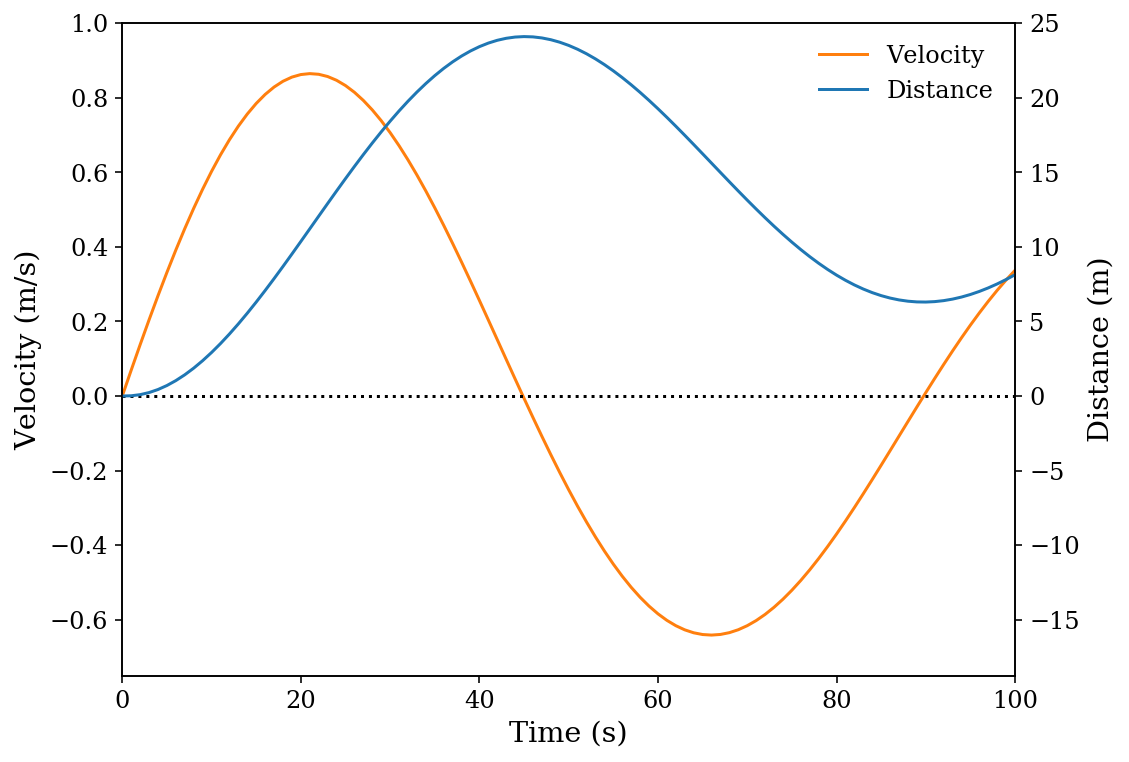

In [14]:
# plot the data
fig9,ax9 = plt.subplots(1,1)

# plot velocity on left axis
ax9.plot(time,vel,c="C1",label="Velocity")

# plot distance on right axis
ax9_right = ax9.twinx()
ax9_right.plot(time,dist,c="C0")
# invisible version of distance on left axis
# so that it shows up in the legend
ax9.plot(60,0,c="C0",label="Distance")

ax9.legend()

# axis settings

ax9.set_xlabel("Time (s)")
ax9.set_xlim(0,100)

ax9.set_ylabel("Velocity (m/s)")
ax9.set_ylim(-0.75,1)

ax9_right.set_ylabel("Distance (m)")
ax9_right.set_ylim(-18.75,25)

# put a dotted line at y=0 because I think it looks nice
x = np.linspace(0,100)
ax9.plot(x,0*x,c='k',linestyle=':')

plt.show()

Note that my trapezoid rule integrator is written to calculate the whole integral over a range, and used the simplified formula from the text. For an application like this, it would probably be more efficienct to calculate the integral trapezoid by trapezoid, because I needed to record the value of the integral at each step. However, as speed wasn't a problem here, I didn't rewrite the function to match this application. Instead, I tried to write the function in a form that might be saved in a module, so that you could load it and use it in a wide variety of applications to integrate functions.

***
#### (6) CP 5.2
###### *Approximating an integral with Simpson's Rule.*

Simpson's rule increases the accuracy of the integral by using parabolas instead of straight lines to interpolate the data. 
After some simplification, the formula is
$$ I(a,b) \approx \frac{1}{3} h \left[ f(a) + f(b)
+ 4 \sum_{\text{k odd}}^{N-1} f(a+kh)
+ 2 \sum_{\text{k even}}^{N-1} f(a+kh) \right] $$

In [26]:
def simp_rule(f,a,b,N):
    """Approximate the integral of f(x) from x=a to x=b. 
    Uses Simpson's Rule with N slices."""
    
    if N % 2 != 0: # if N is odd, complain
        raise Exception("Simpson's Rule requires N to be even.")
    else:
        s = np.linspace(a,b,N+1) # sample the domain
        s = f(s) # apply the function
        s[1:-1:2] *= 4 # multiply odd entries by 4, except first/last
        s[2:-1:2] *= 2 # multiply even entries by 2, except first/last
        h = (b-a)/N
        return 1/3*h*sum(s)

In [27]:
# define the function to integrate
magic_function = lambda x: x**4-2*x+1 

In [28]:
print("The Answer to the Ultimate Question of Life, the Universe, "+
      "and Everything is 4.4\n")

print("Approximating with Simpson's Rule...\n")
slices = [10,100,1000]
for N in slices:
    integral = simp_rule(magic_function,0,2,N)
    fdiff = (integral-4.4)/4.4
    print(("{0:>5} Slices  --  approx: {1:.12f}   "+
          "fractional error: {2:>5.2e}").format(N,integral,fdiff))

The Answer to the Ultimate Question of Life, the Universe, and Everything is 4.4

Approximating with Simpson's Rule...

   10 Slices  --  approx: 4.400426666667   fractional error: 9.70e-05
  100 Slices  --  approx: 4.400000042667   fractional error: 9.70e-09
 1000 Slices  --  approx: 4.400000000004   fractional error: 9.70e-13


Simpson's Rule gives a much more precise error than the Trapezoid Rule with far fewer slices. The fractional error of Simpson's Rule with 10 slices is close to the precision of the Trapezoid Rule with 1000 slices.